In [1]:
%%html
<style>
    .blue {
        background-color: #0074D9;
    }
    .green {
        background-color: #2ECC40;
    }
    
        .purple {
        background-color: #CC99FF;
    }
</style>

<div class="green">
<b> This Project is to create a model which determines the password strength</b>

</div>


In [2]:
import os
import numpy as np
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 

In [3]:
current_dir=os.getcwd()
db_file_name="password_data.sqlite"

In [4]:
file_path=os.path.join(current_dir,db_file_name)

In [5]:
file_path

'/Users/amitnayan/Documents/Nayan/Learning/Password_Strength_Check_MLProject/password_data.sqlite'

In [6]:
#sql_connection_object=sq.connect(r"C:\Users\nayanam\AppData\Roaming\Python\Python39\Scripts\Exercise-Python\NLP Password Project\password_data.sqlite")
sql_connection_object=sq.connect(file_path)

In [7]:
sql_connection_object.execute("select * from Users")

In [8]:
data=pd.read_sql_query("select * from Users",sql_connection_object)

In [9]:
data_copy=data.copy()

In [10]:
data_copy.head(10)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1
5,5,16623670p,1
6,6,yj9q3f8p,1
7,7,180ZIRUVIcuFERy,2
8,8,djredd09,1
9,9,yin172015,1


In [11]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [12]:
data_copy.shape

(100000, 3)

<div class="purple">
    <b>
        Data cleaning steps<br>
        1. check for duplicates<br>
        2. check for missing values<br>
        3. check for irrelevant rows<br>
        4. check for irrelevant features<br>
        5. check if the data type of a feature is correct<br>
    </b>
 </div>
        

<div class="blue">
    <b>
        1. checking for duplicates<br>        
    </b>
 </div>

In [13]:
data_copy.duplicated().sum()

0

<div class="blue">
    <b>
        2. checking for missing values<br>        
    </b>
 </div>

In [14]:
data_copy.isna().sum()

index       0
password    0
strength    0
dtype: int64

In [15]:
data_copy.isnull().any()

index       False
password    False
strength    False
dtype: bool

In [16]:
data_copy.isnull().any().sum()

0

<div class="blue">
    <b>
        3. checking for irrelevant feature<br>        
    </b>
 </div>

In [17]:
data_copy.columns

Index(['index', 'password', 'strength'], dtype='object')

In [18]:
data_copy.head(5)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [19]:
"""index feature is not relavent so drop it."""
data_copy.drop(columns=['index'],axis=1,inplace=True)

In [20]:
data_copy.head(5)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


<div class="blue">
    <b>
    4. check if the data type of a feature is correct
    </b>
 </div>

In [21]:
data_copy.dtypes

password    object
strength     int64
dtype: object

<div class="blue">
       <b>
        3. check for irrelevant rows
    </b>
 </div>

In [22]:
""" Check if any value in feature strength is negative. If its negative then the row is irrelevant"""

data_copy['strength'].unique()

array([1, 2, 0])

<div class="purple">
    <b>
        Data Analysis <br>
        1. check how many passwords are only numeric<br>
        2. check how many passwords have only upper case characters<br>
        3. check how many passwords are alphanumeric<br>
        4. check how many passwords have title case characters<br>
        5. check how many passwords have some special charecters<br>
    </b>
 </div>
        

<div class="blue"><b>
1. check how many passwords are only numeric
    </b>
</div>

In [23]:

data_copy[data_copy["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [24]:
data_copy[data_copy["password"].str.isnumeric()].shape

(26, 2)

<div class="blue"><b>
    2. check how many passwords have only upper case characters
    </b>
</div>    

In [25]:
data_copy[data_copy["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [26]:
data_copy[data_copy["password"].str.isupper()].shape

(1506, 2)

<div class="blue"><b>
    3. check how many passwords are alphanumeric<br>
    </b>
</div>

In [27]:
data_copy[data_copy["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [28]:
data_copy[data_copy["password"].str.isalnum()].shape

(97203, 2)

<div class="blue"><b>
    4. check how many passwords have title case characters<br>
    </b>
</div>

In [29]:
data_copy[data_copy["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [30]:
data_copy[data_copy["password"].str.istitle()].shape

(932, 2)

<div class="blue"><b>
    5. check how many passwords have some special charecters<br>
    Created two functions to check if a string has special character. Can use anyone of those.
    </b>
</div>

In [31]:
""" Function 1 """
def check_special_char_function1(df_row):
    for char in df_row:
        if char.isalpha() or char.isdigit():
            pass
        else:
            return True
    return False

In [32]:
import string

In [33]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
"""Function 2 """
def check_special_char_function2(df_row):
    for char in df_row:
        if char in string.punctuation:
            return True
        else: 
            pass
    return False
    

In [35]:
data_copy["password"].apply(check_special_char_function1)

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [36]:
data_copy["password"].apply(check_special_char_function2)

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [37]:
""" retrive rows where password has special character"""

data_copy[data_copy["password"].apply(check_special_char_function2)==True]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [38]:
data_copy[data_copy["password"].apply(check_special_char_function2)==True].shape

(2663, 2)

<div class="purple">
    <b>
        Feature Engineering <br>
        Create below features that will help to determine the strength of password<br>
        1. Length of password<br>
        2. Lower Case letter frequency<br>
        3. Upper Case letter frequency<br>
        4. Digit frequency<br>
        5. Special Character frequency<br>
    </b>
    NB - Divide frequency by length of password to normalize data(ie 0<=frequency<=1) and avoid outlier. 
 </div>

<div class="blue"><b>
    1. Creating function to determine password length and add a feature "length"
    </b>
</div>

In [39]:
def password_length(password):
    return len(password)

In [40]:
data_copy["length"]=data_copy["password"].apply(password_length)

In [41]:
data_copy.head(5)

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


<div class="blue"><b>
    2. Creating function to determine Lower Case letter frequency and add a feaure called "lower_freq"
    </b>
</div>

In [42]:
def password_lower_freq(password):
  return len([char for char in password if char.islower()])/len(password)
     

In [43]:
np.round(data_copy["password"].apply(password_lower_freq),3)

0        0.333
1        0.417
2        0.778
3        0.783
4        0.625
         ...  
99995    0.700
99996    0.800
99997    0.778
99998    0.667
99999    0.727
Name: password, Length: 100000, dtype: float64

In [44]:
data_copy["lower_freq"]=np.round(data_copy["password"].apply(password_lower_freq),3)

In [45]:
data_copy.head(5)

,password,strength,length,lower_freq
0,zxe870819,1,9,0.333
1,xw46454nr23l,1,12,0.417
2,soporte13,1,9,0.778
3,accounts6000webhost.com,2,23,0.783
4,c443balg,1,8,0.625


<div class="blue"><b>
    2. Creating function to determine Upper Case letter frequency and add a feaure called "upper_freq"
    </b>
</div>

In [46]:
def password_upper_freq(password):
   return len([char for char in password if char.isupper()])/len(password)

In [47]:
np.round(data_copy["password"].apply(password_upper_freq),3)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: password, Length: 100000, dtype: float64

In [48]:
data_copy["upper_freq"]=np.round(data_copy["password"].apply(password_upper_freq),3)

In [49]:
data_copy.head(10)

,password,strength,length,lower_freq,upper_freq
0,zxe870819,1,9,0.333,0.0
1,xw46454nr23l,1,12,0.417,0.0
2,soporte13,1,9,0.778,0.0
3,accounts6000webhost.com,2,23,0.783,0.0
4,c443balg,1,8,0.625,0.0
5,16623670p,1,9,0.111,0.0
6,yj9q3f8p,1,8,0.625,0.0
7,180ZIRUVIcuFERy,2,15,0.200,0.6
8,djredd09,1,8,0.750,0.0
9,yin172015,1,9,0.333,0.0


In [50]:
data_copy[data_copy["upper_freq"]!=0]

,password,strength,length,lower_freq,upper_freq
7,180ZIRUVIcuFERy,2,15,0.200,0.600
14,crnogorac381PG,2,14,0.643,0.143
26,0Y1QKoDUzOAb83Zs,2,16,0.250,0.500
29,greatPERSON123,2,14,0.357,0.429
30,354OfaWaPemymIr,2,15,0.533,0.267
...,...,...,...,...,...
99950,KDys96jkyNQ46Dvh,2,16,0.438,0.312
99963,FvGoE3H3Xg3M4DOouE9k,2,20,0.300,0.450
99980,halflife2010!LEB,2,16,0.500,0.188
99985,IYdKYnTM2NwvRUhA,2,16,0.312,0.625


<div class="blue"><b>
    4. Creating function to determine numeric letter frequency and add a feaure called "digit_freq"
    </b>
</div>

In [51]:
def password_digit_freq(password):
  return len([char for char in password if char.isdigit()])/len(password)

In [52]:
np.round(data_copy["password"].apply(password_digit_freq),3)

0        0.667
1        0.583
2        0.222
3        0.174
4        0.375
         ...  
99995    0.300
99996    0.200
99997    0.222
99998    0.333
99999    0.273
Name: password, Length: 100000, dtype: float64

In [53]:
data_copy["digit_freq"]=np.round(data_copy["password"].apply(password_digit_freq),3)

In [54]:
data_copy.head(5)

,password,strength,length,lower_freq,upper_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


<div class="blue"><b>
    5. Creating function to determine special character frequency and add a feaure called "special_char_freq"
    </b>
</div>

In [55]:
import string
def password_special_char_freq(password):
    return len([char for char in password if char in string.punctuation])/len(password)

In [56]:
np.round(data_copy["password"].apply(password_special_char_freq),3)

0        0.000
1        0.000
2        0.000
3        0.043
4        0.000
         ...  
99995    0.000
99996    0.000
99997    0.000
99998    0.000
99999    0.000
Name: password, Length: 100000, dtype: float64

In [57]:
data_copy["special_char_freq"]=np.round(data_copy["password"].apply(password_special_char_freq),3)

In [58]:
data_copy.head(5)

,password,strength,length,lower_freq,upper_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


In [59]:
data_copy[data_copy["special_char_freq"]!=0]

,password,strength,length,lower_freq,upper_freq,digit_freq,special_char_freq
3,accounts6000webhost.com,2,23,0.783,0.000,0.174,0.043
68,12463773800+,1,12,0.000,0.000,0.917,0.083
98,p.r.c.d.g.,1,10,0.500,0.000,0.000,0.500
145,cita-cita,1,9,0.889,0.000,0.000,0.111
180,karolina.susnina0U,2,18,0.833,0.056,0.056,0.056
...,...,...,...,...,...,...,...
99748,maiselis.com,1,12,0.917,0.000,0.000,0.083
99845,hosting4meze!@#,2,15,0.733,0.000,0.067,0.200
99954,semista_bakung15,2,16,0.812,0.000,0.125,0.062
99980,halflife2010!LEB,2,16,0.500,0.188,0.250,0.062


In [60]:
data_copy[(data_copy["special_char_freq"]!=0) & (data_copy["digit_freq"]==0.174)]

,password,strength,length,lower_freq,upper_freq,digit_freq,special_char_freq
3,accounts6000webhost.com,2,23,0.783,0.000,0.174,0.043
23244,verifyacc2013@gmail.com,2,23,0.739,0.000,0.174,0.087
30020,Dabgdanrizky571n6>cinta,2,23,0.739,0.043,0.174,0.043
38000,qwerty4000webhost%ASDF$,2,23,0.565,0.174,0.174,0.087
45390,galcivar8294@utm.edu.ec,2,23,0.696,0.000,0.174,0.130
52284,1963savitamore@ramtirth,2,23,0.783,0.000,0.174,0.043
96521,mifamiliaeslamejor-1984,2,23,0.783,0.000,0.174,0.043


<div class="purple">
    <b>
        Descristive Statistics <br>
         check min, max, mean, median values group by strength, lower_freq, upper_freq, digit_freq and special_char_freq<br>
    </b>
 </div>

In [61]:
data_copy[['length','strength']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [62]:
data_copy[['strength','lower_freq']].groupby(['strength']).agg(['min','max','mean','median'])

lower_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.708050  0.714
1               0.0  0.923  0.630067  0.667
2               0.0  0.917  0.424679  0.400

In [63]:
data_copy[['strength','upper_freq']].groupby(['strength']).agg(['min','max','mean','median'])

upper_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.012872  0.000
1               0.0  0.923  0.007915  0.000
2               0.0  0.889  0.367633  0.429

In [64]:
data_copy[['strength','digit_freq']].groupby(['strength']).agg(['min','max','mean','median'])

digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.275383  0.286
1               0.0  0.923  0.360123  0.333
2               0.0  0.895  0.193796  0.188

In [65]:
data_copy[['strength','special_char_freq']].groupby(['strength']).agg(['min','max','mean','median'])

special_char_freq                        
                       min    max      mean median
strength                                          
0                      0.0  1.000  0.003195    0.0
1                      0.0  0.818  0.001729    0.0
2                      0.0  0.741  0.013602    0.0

In [66]:
data_copy[['length','strength','lower_freq','upper_freq','digit_freq','special_char_freq']].groupby(['strength']).agg(['min','max','mean','median'])

length                        lower_freq                          \
            min  max       mean median        min    max      mean median   
strength                                                                    
0             1    7   6.550947    7.0        0.0  1.000  0.708050  0.714   
1             8   13   9.611074    9.0        0.0  0.923  0.630067  0.667   
2            14  220  15.953421   16.0        0.0  0.917  0.424679  0.400   

         upper_freq                         digit_freq                   \
                min    max      mean median        min    max      mean   
strength                                                                  
0               0.0  1.000  0.012872  0.000        0.0  1.000  0.275383   
1               0.0  0.923  0.007915  0.000        0.0  0.923  0.360123   
2               0.0  0.889  0.367633  0.429        0.0  0.895  0.193796   

                special_char_freq                          
         median               min    max      mean median  
strength                                                   
0         0.286               0.0  1.000  0.003195    0.0  
1         0.333               0.0  0.818  0.001729    0.0  
2         0.188               0.0  0.741  0.013602    0.0

In [67]:
data_copy.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [68]:
features=['length','lower_freq', 'upper_freq',
       'digit_freq', 'special_char_freq']

In [69]:
for feature in features:
   print( data_copy[['strength',feature]].groupby('strength').agg(['min','max','mean','median']))

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0
         lower_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.708050  0.714
1               0.0  0.923  0.630067  0.667
2               0.0  0.917  0.424679  0.400
         upper_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.012872  0.000
1               0.0  0.923  0.007915  0.000
2               0.0  0.889  0.367633  0.429
         digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.275383  0.286
1               0.0  0.923  0.360123  0.333
2               0.

<Axes: xlabel='strength', ylabel='lower_freq'>

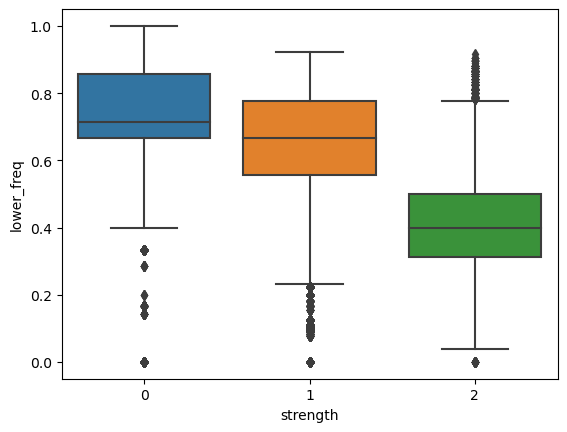

In [70]:
sns.boxplot(x=data_copy['strength'],y=data_copy['lower_freq'])

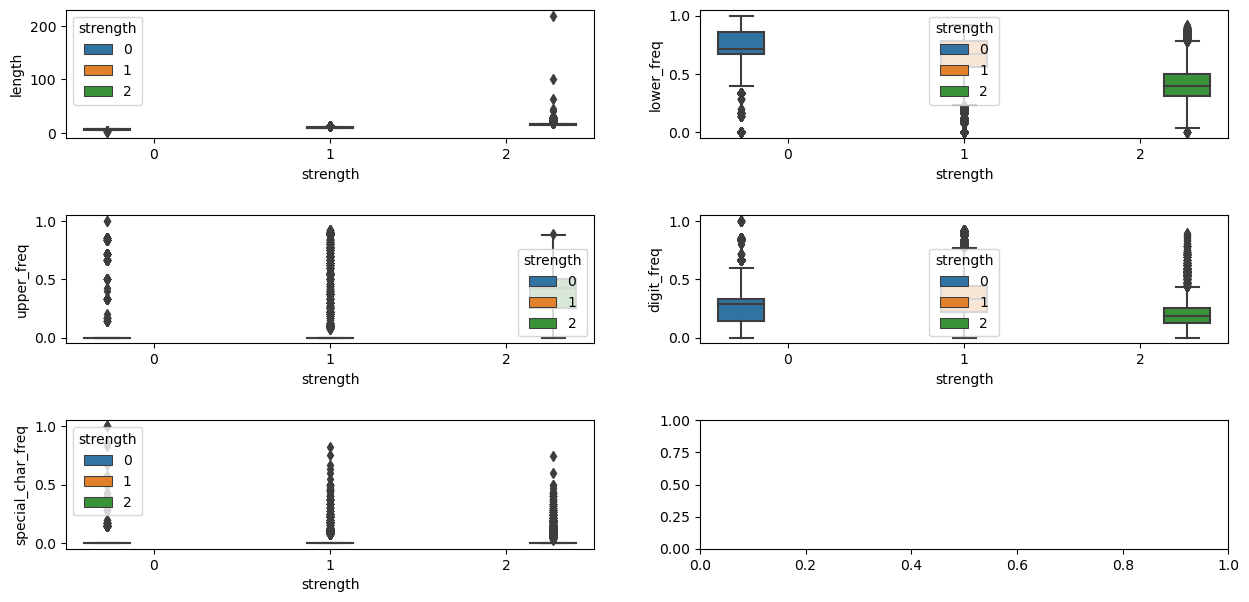

In [71]:
fig,((ax11,ax12),(ax21,ax22),(ax31,ax32))=plt.subplots(3,2,figsize=(15,7))
sns.boxplot(x='strength',y='length', hue='strength',ax=ax11, data=data_copy)
sns.boxplot(x='strength',y='lower_freq',hue='strength',ax=ax12, data=data_copy)
sns.boxplot(x='strength',y='upper_freq',hue='strength',ax=ax21, data=data_copy)
sns.boxplot(x='strength',y='digit_freq',hue='strength',ax=ax22, data=data_copy)
sns.boxplot(x='strength',y='special_char_freq',hue='strength',ax=ax31, data=data_copy)
plt.subplots_adjust(hspace=0.6)



<div class="purple">
    <b>
        Calculate Feature's Mutual Information (MI) score to determine Which features are important
    </b>
 </div>

In [72]:
y=data_copy['strength']
X=data_copy.drop(columns=['strength','password'],axis=1)

In [73]:
mi_score=mutual_info_regression(X,y)

In [74]:
mi_score

array([0.75566812, 0.4979891 , 0.30839375, 0.49950222, 0.03060397])

In [75]:
mi_score_df=pd.DataFrame(mi_score, index=X.columns,columns=['Feature_Importance_Score/MI Score'] )

In [76]:
mi_score_df.sort_values(by= 'Feature_Importance_Score/MI Score', ascending=False)

,Feature_Importance_Score/MI Score
length,0.755668
digit_freq,0.499502
lower_freq,0.497989
upper_freq,0.308394
special_char_freq,0.030604


<div class="purple">
    <b>
        Univariate Analysis to determine Which features are important
    </b>
 </div>

In [77]:
from warnings import filterwarnings
filterwarnings("ignore")

<Axes: ylabel='Density'>

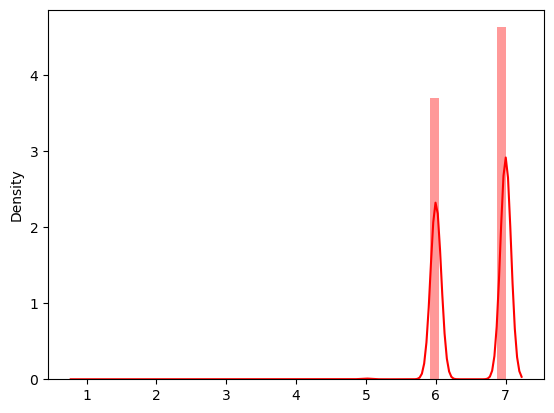

In [78]:
sns.distplot(x=data_copy[data_copy['strength']==0]['length'],color='red')

In [79]:
def get_plot(df,feature):
    #plt.figure(figsize=(10,10))
    fig, (ax11,ax12)=plt.subplots(1,2)
    sns.violinplot(x='strength',y=feature,data=df,ax=ax11)
    sns.distplot(x=df[df['strength']==0][feature],ax=ax12,color='blue', label='Strength = 0', axlabel=feature, hist=False)
    sns.distplot(x=df[df['strength']==1][feature],ax=ax12,color='orange', label='Strength = 1', axlabel=feature, hist=False)
    sns.distplot(x=df[df['strength']==2][feature],ax=ax12,color='green', label='Strength = 2', axlabel=feature, hist=False)
    plt.subplots_adjust(hspace=0.6)
    plt.legend()
    plt.show()
   

<div class=blue>
    <b> Looking at below graphs for different features, we concluded we have less overlapping in case of length feature and lower_freq feature. <br>
        Also MI score for features length and lower_freq are greater than 50% and hence these two features are worth to consider.
        </div>        

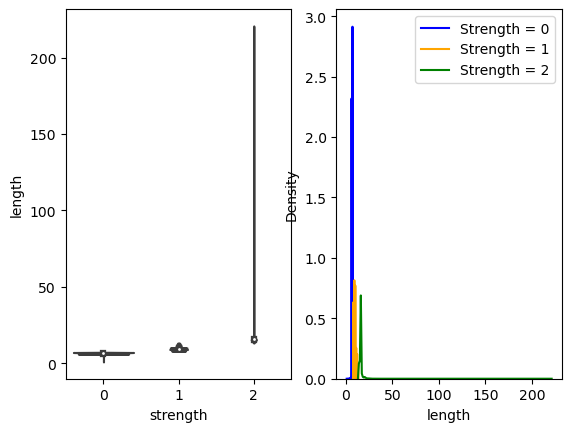

In [80]:
get_plot(data_copy,'length')

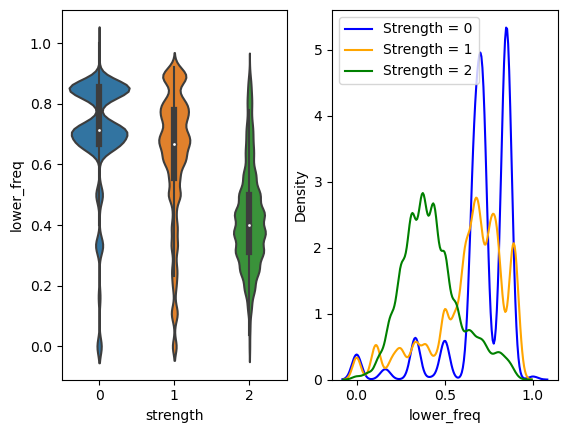

In [81]:
get_plot(data_copy,'lower_freq')

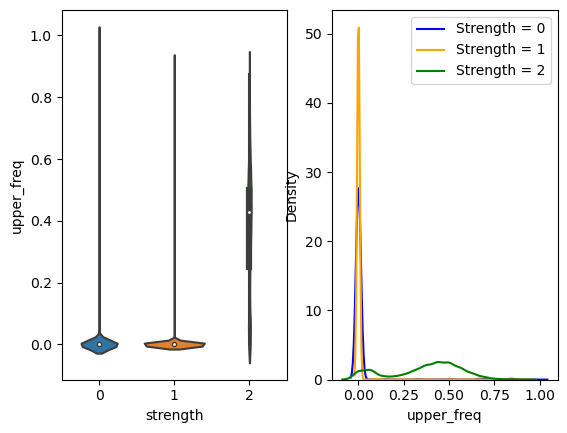

In [82]:
get_plot(data_copy,'upper_freq')

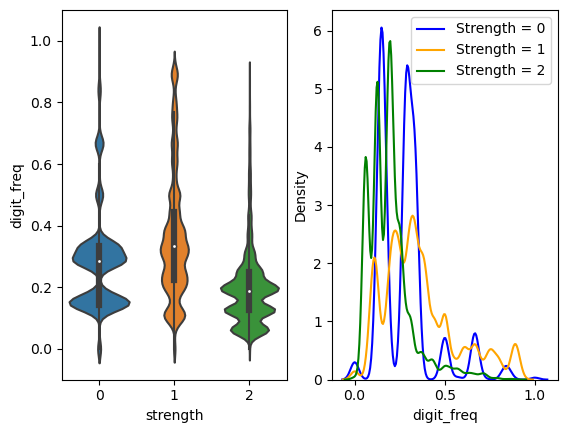

In [83]:
get_plot(data_copy,'digit_freq')

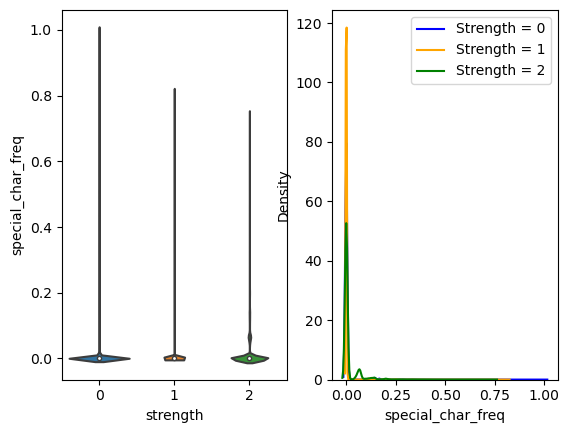

In [84]:
get_plot(data_copy,'special_char_freq')

<div class="purple">
    <b>
        Feature Engineering. Check if any feature need to be converted into numerical. 
     </b><br>   
        Here password feature is categorical and needs conversion/encoding before passing to model. We will convert password feature into <B>TF-IDF matrix feature using TfidfVectorizer</B>
    
 </div>

In [85]:
data_copy.head()

,password,strength,length,lower_freq,upper_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


<div class ="blue">
    <b> Shuffle the data using sample() from pandas dataframe</b>
        </div>        

In [86]:
# Shuffle the data using pandas df sample() function
data_copy_frame=data_copy.sample(frac=1)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
vectorizer=TfidfVectorizer(analyzer='char')

In [89]:
x=list(data_copy_frame['password'])

In [90]:
X=vectorizer.fit_transform(raw_documents=x)

<div class="blue">
    fit_transform converted password feature to a sparse matrix using 99 dimensions and the no of rows are same ie 100000. See below the comparison
    </div>

In [91]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [92]:
# dimension is 99 ie every password is represented using 99 dimensions
X.shape

(100000, 99)

In [93]:
#dimension is 1 ie every password is represented using 1 dimension
data_copy['password'].shape

(100000,)

In [94]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
# accessing sparse matrix(capital X) value at zeroth index which corresponds to a password at zeroth index of small x
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21467212, 0.        , 0.        , 0.21340704, 0.        ,
       0.23856038, 0.        , 0.24882305, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25176626, 0.25598719,
       0.        , 0.27520371, 0.2455982 , 0.        , 0.        ,
       0.20389233, 0.        , 0.        , 0.30041821, 0.2112722 ,
       0.        , 0.22491388, 0.        , 0.2866797 , 0.27496271,
       0.        , 0.2450816 , 0.2822729 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [96]:
data_copy_frame['password']

15507    R3j7ywTkzNgVh0Q5
96327           xindrax12
22610           ulawog719
30607          25l7m9oq98
67684    B5SwkrDc0MQH4XWl
               ...       
70861         spider86534
68465            rt22rw08
89236       ALANFUENTES12
27643          zgafjnc074
70951          black-pdlc
Name: password, Length: 100000, dtype: object

<div class="blue">
There are 99 char/dimension that is sparse matrix's feature and is used to encode/convert each character of passoword.
</div>

In [97]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [98]:
df2=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [99]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="blue">
<b> during our analysis above to determine which feature is important, we colcluded feature 'length' and 'lower_freq' are important.<br>
So include both the features in dataframe df2 as well.
</div>

In [100]:
df2['length']=data_copy_frame['length']
df2['lower_freq']=data_copy_frame['lower_freq']

In [101]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lower_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


<div class="purple">
    <b>
        Model Building
    </b>
    <br>We have below features as <b>independent variables </b> in data frame df2</br>
    1. password - represented as different characters/features of sparse matrix <br>
    2. length <br>
    3. lower_freq <br><br>
    We need to predict password's strength so feature  strength is <b>dependent variable</b> <br>
    <b> Since we have discreate dependent variable, its a classification problem and we will use classification ML model ie LogisticRegression</b>
    
 </div>

<div class="blue">
    <b> Split train and test data
        </div>

In [102]:
from sklearn.model_selection import train_test_split 

In [103]:
y=data_copy_frame['strength']
X=df2

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [105]:
X_train.shape

(80000, 101)

In [106]:
y_train.shape

(80000,)

<div class="blue">
<b> train model and predict password strength on test data
</div>

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
# parameter multi_class is set to "multinomial" because our dependent varialble ie strength takes 3 values ie 0,1 or 2
ml_classification_model=LogisticRegression(multi_class="multinomial")


In [109]:
ml_classification_model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [110]:
y_predict=ml_classification_model.predict(X_test)

In [111]:
y_predict

array([1, 1, 1, ..., 1, 1, 2])

In [112]:
pd.DataFrame(y_predict,columns=['Strength'])

,Strength
0,1
1,1
2,1
3,1
4,1
...,...
19995,1
19996,2
19997,1
19998,1


<div class="blue">
    <b> Check how many paswords from testing data sets are of different strengths</b>
        </div>

In [113]:
from collections import Counter

In [114]:
Counter(y_predict)

Counter({1: 16829, 2: 1820, 0: 1351})

<div class="blue">
<b> calculate Accuracy score for predicted password strength based on test data
<div>

In [115]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 

In [116]:
accuracy_score(y_test, y_predict)

0.7967

In [117]:
confusion_matrix(y_test, y_predict)

array([[  701,  2015,     7],
       [  581, 13827,   407],
       [   69,   987,  1406]])

In [118]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.52      0.26      0.34      2723
           1       0.82      0.93      0.87     14815
           2       0.77      0.57      0.66      2462

    accuracy                           0.80     20000
   macro avg       0.70      0.59      0.62     20000
weighted avg       0.77      0.80      0.78     20000



<div class="blue">
    <b>
    Define a function to input password from user and call our ML model to check if it is week or strong
    </b>
    </div>

In [119]:
def check_passoword_strength():
    password=input("Enter a password :")
    sample_array=np.array([password])
    sample_matrix=vectorizer.transform(sample_array)
    target_matrix=np.append(sample_matrix.toarray(),(password_length(password),password_lower_freq(password))).reshape(1,101)
    strength=ml_classification_model.predict(target_matrix)
    if strength==0:
        print("Your Password Strength :{}\n Password is week.".format(strength[0]))
    elif strength==1:
        print("Your Password Strength :{}\n Password is Normal.".format(strength[0]))
    else:
        print("Your Password Strength :{}\n Password is Strong.".format(strength[0]))

In [120]:
check_passoword_strength()

Enter a password :12@^H&jk%
Your Password Strength :0
 Password is week.


In [124]:
check_passoword_strength()

Enter a password :dsfKKgUnPSh56$#2ar
Your Password Strength :2
 Password is Strong.
